# An analysis of Current NFL Referees
## Memphis Lau

Seemingly every game, fans of a losing team will blame the referees. But, how true can that statement really be? The role referees play in any sport, and especially the sport of American football, is crucial. A single call, whether correct or incorrect, can change an entire game, shifting momentum or even deciding the outcome. Just in the most recent SuperBowl this February, in the most important third down of the game, the refs called a pass-interference on Eagles CB James Bradberry. As a result, the Chiefs extended their drive and were able to win the game. Referees have the power to influence so much in the sport. This article explores referees of the National Football League: all that were active for the most recent 2022-2023 season. We examine all of the games ever reffed by them, finding patterns and giving betting tips.

In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reading in the Data

In [2]:
adrian_hill = pd.read_csv("adrian_hill.csv")
adrian_hill['name'] = 'Adrian Hill'
alex_kemp = pd.read_csv("alex_kemp.csv")
alex_kemp['name'] = 'Alex Kemp'
bill_vinovich = pd.read_csv("bill_vinovich.csv")
bill_vinovich['name'] = 'Bill Vinovich'
brad_allen = pd.read_csv("brad_allen.csv")
brad_allen['name'] = 'Brad Allen'
brad_rogers = pd.read_csv("brad_rogers.csv")
brad_rogers['name'] = 'Brad Rogers'
carl_cheffers = pd.read_csv("carl_cheffers.csv")
carl_cheffers['name'] = 'Carl Cheffers'
clay_martin = pd.read_csv("clay_martin.csv")
clay_martin['name'] = 'Clay Martin'
clete_blakeman = pd.read_csv("clete_blakeman.csv")
clete_blakeman['name'] = 'Clete Blakeman'
craig_wrolstad = pd.read_csv("craig_wrolstad.csv")
craig_wrolstad['name'] = 'Craig Wrolstad'
jerome_boger = pd.read_csv("jerome_boger.csv")
jerome_boger['name'] = 'Jerome Boger'
john_hussey = pd.read_csv("john_hussey.csv")
john_hussey['name'] = 'John Hussey'
land_clark = pd.read_csv("land_clark.csv")
land_clark['name'] = 'Land Clark'
ron_torbert = pd.read_csv("ron_torbert.csv")
ron_torbert['name'] = 'Ron Torbert'
scott_novak = pd.read_csv("scott_novak.csv")
scott_novak['name'] = 'Scott Novak'
shawn_hochuli = pd.read_csv("shawn_hochuli.csv")
shawn_hochuli['name'] = 'Shawn Hochuli'
shawn_smith = pd.read_csv("shawn_smith.csv")
shawn_smith['name'] = 'Shawn Smith'

In [3]:
data = np.vstack([adrian_hill, alex_kemp, bill_vinovich, brad_allen, brad_rogers, 
                  carl_cheffers, clay_martin, clete_blakeman, craig_wrolstad, jerome_boger,
                 john_hussey, land_clark, ron_torbert, scott_novak, shawn_hochuli, shawn_smith])
data = pd.DataFrame(data)
data.columns = ['Date', 'Week', 'Neutral', 'Away', 'Home', 'Spread', 'Favored', 'O/U', 'Score_Away', 'Score_Home',
                'Spread_Covered', 'Over_Covered', 'Name']

In [4]:
data.head()

,Date,Week,Neutral,Away,Home,Spread,Favored,O/U,Score_Away,Score_Home,Spread_Covered,Over_Covered,Name
0,09/15/2019,2,no,chi,den,3.0,away,40.5,16,14,0,0,Adrian Hill
1,09/22/2019,3,no,mia,dal,22.0,home,46.5,6,31,1,0,Adrian Hill
2,09/29/2019,4,no,car,hou,5.5,home,47.5,16,10,0,0,Adrian Hill
3,10/06/2019,5,no,nyj,phi,14.0,home,43.0,6,31,1,0,Adrian Hill
4,10/13/2019,6,no,sea,cle,1.0,home,45.5,32,28,0,1,Adrian Hill


## About the Data
Before we look into individual referee metrics, we will first explore this dataset. There are 1772 different games in this dataset, there are no duplicate games.

In [5]:
# Adding season and whether game is playoff
season_array = []
playoff_array = []
for i in range(len(data)):
    playoff_array.append(str(data.loc[i, 'Week']).isalpha())
    year = int(data.iloc[i,0][6:10])
    month = int(data.iloc[i,0][0:2])
    if year == 2004 or (year == 2005 and month < 6):
        season_array.append('2004-05')
    if (year == 2005 and month > 6) or (year == 2006 and month < 6):
        season_array.append('2005-06')
    if (year == 2006 and month > 6) or (year == 2007 and month < 6):
        season_array.append('2006-07')
    if (year == 2007 and month > 6) or (year == 2008 and month < 6):
        season_array.append('2007-08')
    if (year == 2008 and month > 6) or (year == 2009 and month < 6):
        season_array.append('2008-09')
    if (year == 2009 and month > 6) or (year == 2010 and month < 6):
        season_array.append('2009-10')
    if (year == 2010 and month > 6) or (year == 2011 and month < 6):
        season_array.append('2010-11')
    if (year == 2011 and month > 6) or (year == 2012 and month < 6):
        season_array.append('2011-12')
    if (year == 2012 and month > 6) or (year == 2013 and month < 6):
        season_array.append('2012-13')
    if (year == 2013 and month > 6) or (year == 2014 and month < 6):
        season_array.append('2013-14')
    if (year == 2014 and month > 6) or (year == 2015 and month < 6):
        season_array.append('2014-15')
    if (year == 2015 and month > 6) or (year == 2016 and month < 6):
        season_array.append('2015-16')
    if (year == 2016 and month > 6) or (year == 2017 and month < 6):
        season_array.append('2016-17')
    if (year == 2017 and month > 6) or (year == 2018 and month < 6):
        season_array.append('2017-18')
    if (year == 2018 and month > 6) or (year == 2019 and month < 6):
        season_array.append('2018-19')
    if (year == 2019 and month > 6) or (year == 2020 and month < 6):
        season_array.append('2019-20')
    if (year == 2020 and month > 6) or (year == 2021 and month < 6):
        season_array.append('2020-21')
    if (year == 2021 and month > 6) or (year == 2022 and month < 6):
        season_array.append('2021-22')
data['Season'] = season_array
data['Playoff'] = playoff_array

In [6]:
# Number of playoff games in the dataset
len(data[data.Playoff == 1])

73

In [246]:
# Number of seasons
len(data.Season.unique())

18

There are 73 playoff games in this dataset, across 18 seasons.

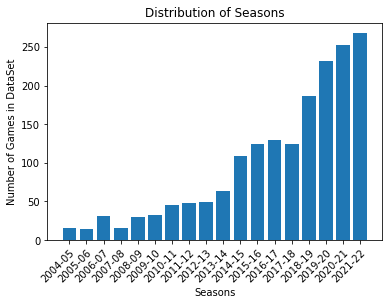

In [7]:
seasons = data.groupby('Season').Name.count()
plt.bar(seasons.index, seasons)
plt.xlabel('Seasons')
plt.ylabel('Number of Games in DataSet')
plt.xticks(rotation  = 45, ha = 'right', rotation_mode = 'anchor')
plt.title('Distribution of Seasons')
plt.show()

### Distribution of Referees

In [8]:
refs = data.groupby('Name').Name.count()
len(refs)

16

This dataset has the games of 16 different referees from 18 seasons- from 2004 to 2022: Adrian Hill, Alex Kemp, Bill Vinovich, Brad Allen, Brad Rogers, Carl Cheffers, Clay Martin, Clete Blakeman, Craig Wrolstad, Jerome Boger, John Husey, Land Clark, Ron Torbert, Scott Novak, Shawn Hochuli, and Shawn Smith.

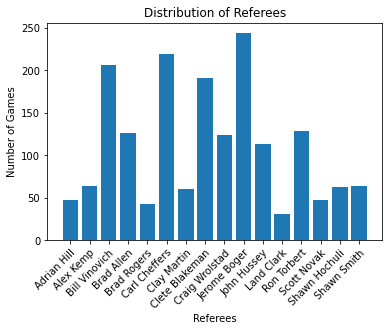

In [9]:
plt.bar(refs.index, refs)
plt.xlabel('Referees')
plt.xticks(rotation = 45, ha = 'right', rotation_mode = 'anchor')
plt.ylabel("Number of Games")
plt.title("Distribution of Referees")
plt.show()

### Distribution of Spread

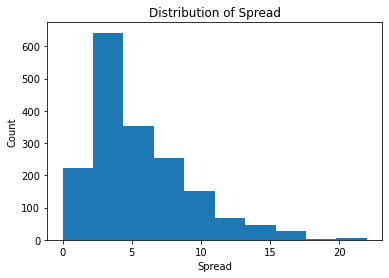

In [11]:
plt.hist(data.Spread)
plt.xlabel("Spread")
plt.ylabel("Count")
plt.title("Distribution of Spread")
plt.show()

For those that do not know, the spread is a mechanism used by sportsbooks to leverage the skill levels of two opposing teams. Assume two completely evenly skilled teams match up. Then it will be a 50/50 chance that either one wins, and it makes sense that betting on either team to win will be of equal risk and reward. However, this situation of evenly skilled teams is very rare. A team may actually have a 75% chance to win a game against a worse opponent. To make up for this and maintain the 50/50 bet that we all know makes sense intuitively, sportsbooks use the "spread". They declare a point total that the favorited team must win by. This is calculated as a new 50/50 chance to happen. For example, if the spread is 3.0, then the favorite must win by more than 3 points to cover the spread. For a betting person, if they bet that the favorite would cover the spread, then they can only make money if the favorite wins AND wins by more than the spread. 

As can see with the graph, the most common spreads are around 3-5 points, indicating a relatively close matchup. When an extremely good team matches up with an extremely bad team, the spread can skyrocket to large numbers. For example, we see some games with spreads of 15+. In football, it seems absolutely absurd to consider it a 50/50 chance tht one team wins by 15+, but it still happens occasionally.

Typically, the sports bettors bet on a favorite to cover the spread much more often than they will bet an underdog to stop the favorite from covering. 

Note: For the sake of this project, we will not be considering when a spread is pushed. This is when a spread is, for example, 3.0, and the favored team wins by exactly three points. In this case, the bettor would receive his or her money back as a refund. In our dataset, that option is a 2 in the Spread_Covered column, so we will remove those 40 observations.

In [76]:
data = data[data.Spread_Covered <2].reset_index()

In [63]:
mean_spread = data.Spread_Covered.sum() / len(data)
mean_spread

0.4740184757505774

This dataset has a great mix of games in which the favorite covered the spread, and games in which the underdog covered, almost at 50%.

In [64]:
data.groupby("Favored").Favored.count()

Favored
away     608
home    1124
Name: Favored, dtype: int64

The dataset has almost twice as much games where the favorite is the home team, which makes a lot of sense. In football, home field advantage is very strong, as thousands of fans screaming in support of a team can affect both sides' mentality greatly throughout a game. Generally, sportsbooks add around 3 points to the spread for the home team. Thus, it makes sense that our dataset has more games with home team favorites.

### Distribution of O/U

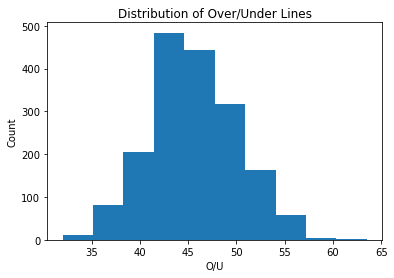

In [14]:
plt.hist(data['O/U'])
plt.xlabel("O/U")
plt.ylabel("Count")
plt.title("Distribution of Over/Under Lines")
plt.show()

Another favorite for sports bettors is the over/under lines. Sportsbooks, through many calculations and market research, determine a number, and it is up to the bettors to decide whether the entire total (sum of points from both teams) will be higher or lower than that number. The distribution plotted seems relatively normal, with a mean at around 46 points. Obviously, two good offenses squaring up will lead to a higher O/U line set by the sportsbooks, and two good defenses would cause a low line. 

In [66]:
mean_ou = data.Over_Covered.sum() / len(data)
mean_ou

0.5075057736720554

Again, this dataset has a great mix of high-scoring games and low_scoring games, almost at a perfect 50%.
## Every Referees' Favorite Win Percentage

In [78]:
fav_win = np.zeros(len(data))
for i in range(len(data)):
    if data.loc[i,'Favored'] == 'home' and data.loc[i,'Score_Home'] > data.loc[i,'Score_Away']:
        fav_win[i] = 1
    elif data.loc[i,'Favored'] == 'away' and data.loc[i,'Score_Away'] > data.loc[i, 'Score_Home']:
        fav_win[i] = 1
data['Favorite_win'] = fav_win

In [79]:
win_mean = np.mean(data.Favorite_win)
win_mean

0.6374133949191686

Our dataset has games in which the favorite wins 63.74% of the time. Let's see how games reffed by certain referees deviate from this number

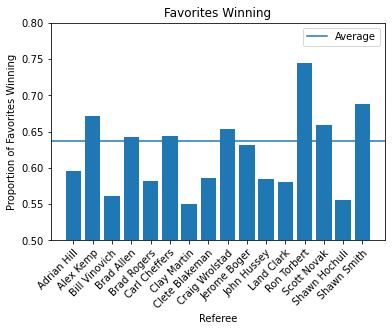

In [80]:
win_rate = data.groupby('Name').Favorite_win.sum()
win_proportions = win_rate / num_games
plt.bar(win_proportions.index, win_proportions)
plt.axhline(win_mean, label = 'Average')
plt.xlabel('Referee')
plt.ylabel('Proportion of Favorites Winning')
plt.ylim([0.5,0.8])
plt.title('Favorites Winning')
plt.xticks(rotation = 45, ha = 'right', rotation_mode = 'anchor')
plt.legend()
plt.show()

Ron Torbert has the highest proportion of his games leading to the favorite winning. Shawn Hochuli and Clay Martin may favor the underdogs more, though. Overall, every ref has the favorites winning at least 55% of the time, which shows there are no hugely unfair referees.

However, sometimes a favorite is just much better than the underdog, and a win from them means nothing. A better way to gage the patterns of these referees is by looking at the spread.

## Every Referees' Spread Coverage

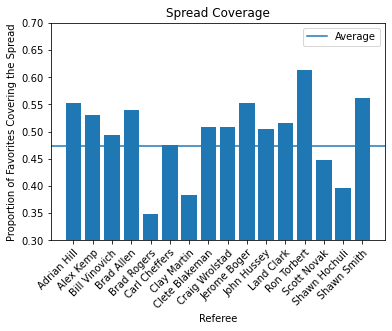

In [81]:
spread_proportions = spread_coverage / num_games
plt.bar(spread_proportions.index, spread_proportions)
plt.axhline(mean_spread, label = 'Average')
plt.xlabel('Referee')
plt.ylabel('Proportion of Favorites Covering the Spread')
plt.ylim([0.3,0.7])
plt.title('Spread Coverage')
plt.xticks(rotation = 45, ha = 'right', rotation_mode = 'anchor')
plt.legend()
plt.show()

The proportions of spread coverage amongst the different referees in this dataset are not significantly different. The highest proportion is Ron Torbert at 61.24% of his officiated games having the favorite cover. The lowest is Brad Rogers at 34.88%. These maximum and minimum values are significant different than the mean of around 50%.

In [247]:
spread_proportions

Name
Adrian Hill       0.553191
Alex Kemp          0.53125
Bill Vinovich     0.492754
Brad Allen        0.539683
Brad Rogers       0.348837
Carl Cheffers     0.474886
Clay Martin       0.383333
Clete Blakeman    0.507853
Craig Wrolstad    0.508065
Jerome Boger      0.553279
John Hussey       0.504425
Land Clark        0.516129
Ron Torbert       0.612403
Scott Novak       0.446809
Shawn Hochuli     0.396825
Shawn Smith         0.5625
Name: Spread_Covered, dtype: object

### Alarming Win Rates for Certain Teams and Refs

In [220]:
refs = data.Name.unique()
refs_by_team = pd.DataFrame(columns = ['Name', 'Team', 'Total Games', 'Wins', 'Percentage'])
for i in refs:
    ref_data = data[(data.Name == i)]
    ref_home = ref_data[ref_data.Favored == 'home']
    ref_away = ref_data[ref_data.Favored == 'away']
    home_count = ref_data.groupby('Home').Spread_Covered.count()
    away_count = ref_data.groupby('Away').Spread_Covered.count()
    home_favor_win = ref_home.groupby('Home').Spread_Covered.sum()
    away_favor_win = ref_away.groupby('Away').Spread_Covered.sum()
    home_u_win = ref_away.groupby('Home').Spread_Covered.count().subtract(ref_away.groupby('Home').Spread_Covered.sum(), fill_value = 0)
    away_u_win = ref_home.groupby('Away').Spread_Covered.count().subtract(ref_home.groupby('Away').Spread_Covered.sum(), fill_value = 0)
    total = home_count.add(away_count, fill_value = 0)
    wins = home_favor_win.add(away_favor_win, fill_value = 0).add(home_u_win, fill_value = 0).add(away_u_win, fill_value = 0)
    d = {'Name' : np.repeat(i, len(total)), 'Team' : total.index, 'Total Games' : total.values, 'Wins' : wins, 'Percentage' : 
                                     wins.divide(total, fill_value = 0)}
    ref_teams = pd.DataFrame(d).reset_index()
    refs_by_team = pd.concat([refs_by_team, ref_teams], ignore_index = True)
teams = refs_by_team.drop('index', axis = 1)

In [225]:
teams[(teams['Total Games'] >= 10) & (teams.Percentage >= 0.7)]

,Name,Team,Total Games,Wins,Percentage
79,Bill Vinovich,lv,10,7,0.7
82,Bill Vinovich,ne,14,10,0.714286
91,Bill Vinovich,ten,10,7,0.7
222,Clete Blakeman,atl,10,7,0.7
261,Craig Wrolstad,dal,10.0,7,0.7
287,Jerome Boger,bal,16,12,0.75
293,Jerome Boger,dal,16,12,0.75
298,Jerome Boger,ind,10,8,0.8
339,John Hussey,no,10,7,0.7
382,Ron Torbert,car,10.0,7,0.7


Here are 11 instances of a ref who has refereed at least 10 games with one team, where that team has gone on to cover the spread at least 70% of the time. Considering the spread is designed to be a 50/50 chance, a 70% win rate is alarming. 

In [226]:
teams[(teams['Total Games'] >= 10) & (teams.Percentage <= 0.3)]

,Name,Team,Total Games,Wins,Percentage
64,Bill Vinovich,buf,11,3,0.272727
75,Bill Vinovich,jax,10,3,0.3
78,Bill Vinovich,lar,18,4,0.222222
80,Bill Vinovich,mia,11,3,0.272727
94,Brad Allen,atl,11.0,3,0.272727
164,Carl Cheffers,cle,11,3,0.272727
167,Carl Cheffers,det,10,3,0.3
262,Craig Wrolstad,den,11.0,3,0.272727
270,Craig Wrolstad,lar,10.0,3,0.3
272,Craig Wrolstad,mia,10.0,2,0.2


In [228]:
teams[(teams.Percentage == 0) & (teams['Total Games'] >= 5)]

,Name,Team,Total Games,Wins,Percentage
66,Bill Vinovich,chi,8,0,0.0
321,John Hussey,car,5,0,0.0


Do not bet Chicago to cover the spread when Bill Vinovich is a coach.

In [229]:
teams[(teams.Percentage == 1) & (teams['Total Games'] >= 5)]

,Name,Team,Total Games,Wins,Percentage
342,John Hussey,phi,5,5,1.0
462,Shawn Hochuli,ne,5.0,5,1.0


## Every Referees' O/U Coverage

In [21]:
ou_coverage = data.groupby('Name').Over_Covered.sum()

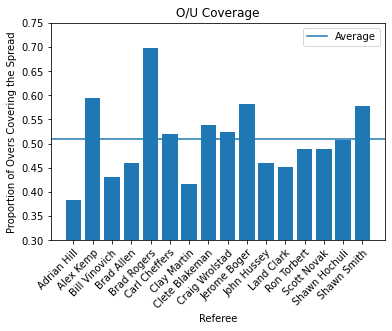

In [22]:
over_proportions = ou_coverage / num_games
plt.bar(over_proportions.index, over_proportions)
plt.axhline(mean_ou, label = 'Average')
plt.xlabel('Referee')
plt.ylabel('Proportion of Overs Covering the Spread')
plt.ylim([0.3,0.75])
plt.title('O/U Coverage')
plt.legend()
plt.xticks(rotation = 45, ha = 'right', rotation_mode = 'anchor')
plt.show()

In [23]:
over_proportions

Name
Adrian Hill       0.382979
Alex Kemp          0.59375
Bill Vinovich     0.429952
Brad Allen        0.460317
Brad Rogers       0.697674
Carl Cheffers     0.520548
Clay Martin       0.416667
Clete Blakeman    0.539267
Craig Wrolstad    0.524194
Jerome Boger      0.581967
John Hussey       0.460177
Land Clark        0.451613
Ron Torbert       0.488372
Scott Novak       0.489362
Shawn Hochuli     0.507937
Shawn Smith       0.578125
dtype: object

The highest percentage of games in which the point total was covered belongs to referee Brad Rogers, at a surprisngly high 69.76%. The lowest percentage is Adrian Hill at 38.3%. These numbers are also shockingly different from the mean of 50% in our dataset.

## Through the Years

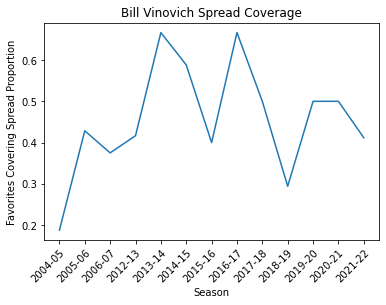

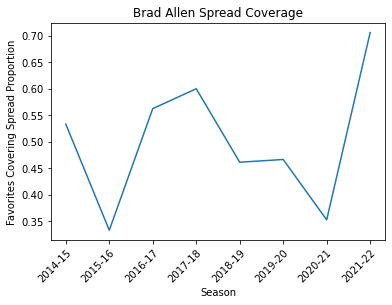

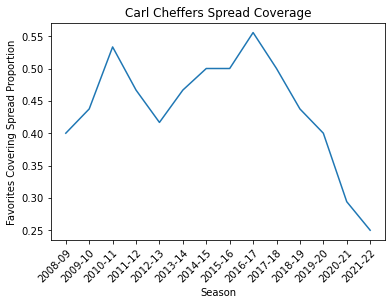

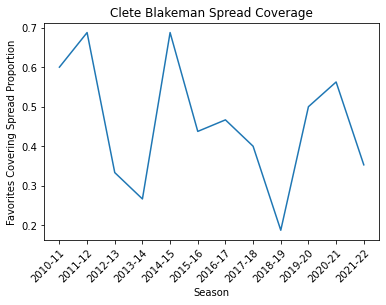

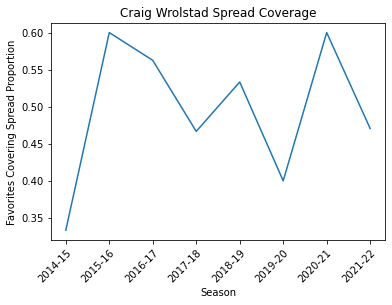

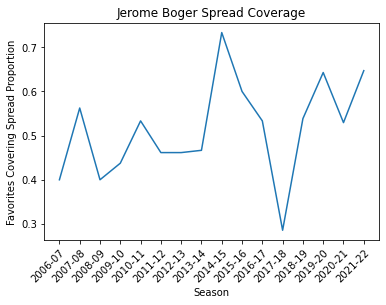

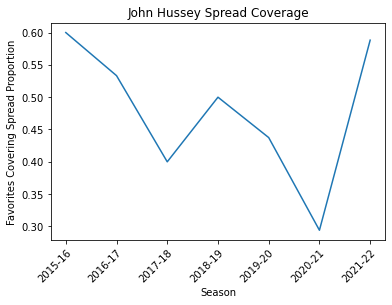

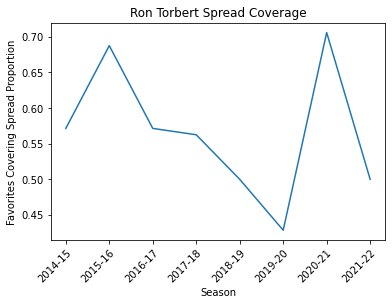

In [241]:
for ref in refs:
    seasons = data[data.Name == ref].Season.unique()
    if len(seasons) > 5:
        graph = data[data.Name == ref].groupby('Season').Spread_Covered.mean()
        plt.plot(graph)
        plt.xticks(rotation = 45, ha = 'right', rotation_mode = 'anchor')
        plt.xlabel('Season')
        plt.ylabel('Favorites Covering Spread Proportion')
        title_string = ref + ' Spread Coverage'
        plt.title(title_string)
        plt.show()

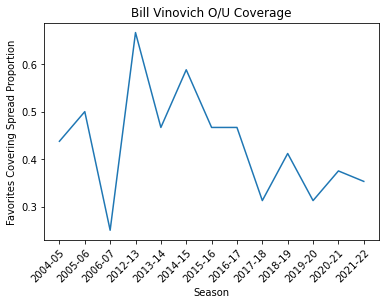

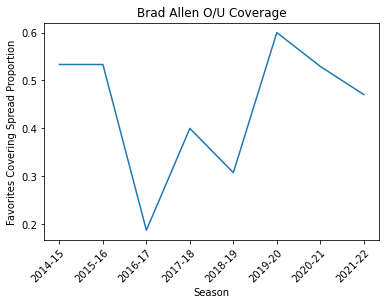

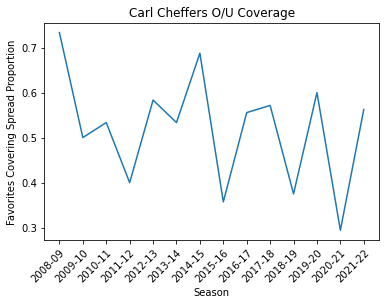

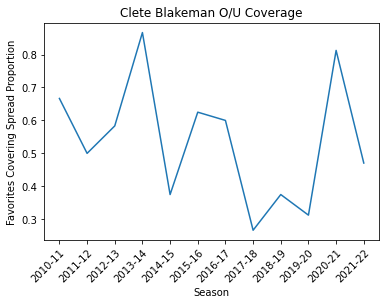

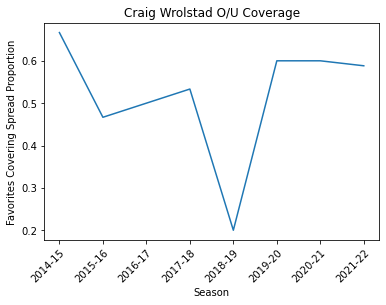

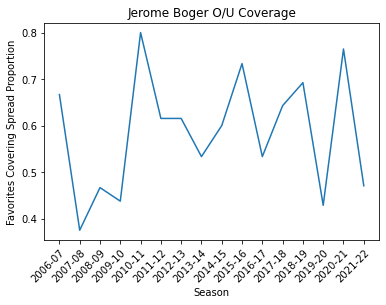

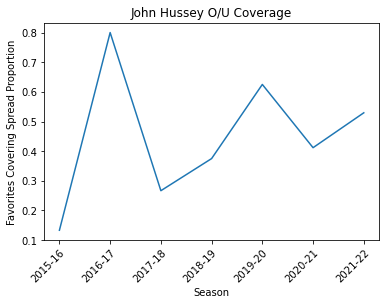

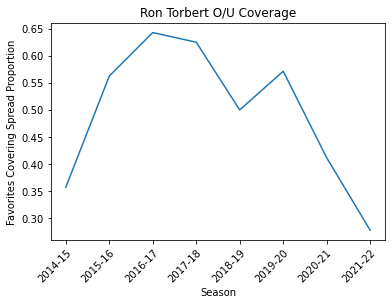

In [242]:
for ref in refs:
    seasons = data[data.Name == ref].Season.unique()
    if len(seasons) > 5:
        graph = data[data.Name == ref].groupby('Season').Over_Covered.mean()
        plt.plot(graph)
        plt.xticks(rotation = 45, ha = 'right', rotation_mode = 'anchor')
        plt.xlabel('Season')
        plt.ylabel('Favorites Covering Spread Proportion')
        title_string = ref + ' O/U Coverage'
        plt.title(title_string)
        plt.show()

There are no eye-opening trends over the years for any referee. The only note-worthy oberservations from all these plots are the under winning in more games through the years for Ron Torbert and Bill Vinovich. Carl Cheffers started to see more underdogs winning later in his career.

## Conclusion
So, while referees are supposed to be as fair as possible, our data has shown that some can deviate from the mean and probably affect games more than they should. All of our findings are strictly based on correlation, NOT causation. Thus, we have no evidence that any referee is actively rigging any games, purposely forcing games to be over the projected line, or favoring the underdog. 

These are simply interesting patterns to look out for when betting games or just watching them. I hope this article encourages you to look up a game’s referee lineup before the coin flip and see if these patterns hold. 
